In [ ]:
#@title 


%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="width:25%; height:150px; display: flex;">

<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/GSS_semana_geofisica.png" height="40%">

</div>
<div style="width:50%; height:150px; text-align:center;">

<br><br>

<span style="color:purple; font-size: 16pt;">Minicurso Python para Geofísicos <br></span>
<span style="color:purple; font-size: 25pt;font-weight: bold;">Filtragem no domínio da frequência</span>

</div>

<div style="width:25%; height:150px; text-align:right">
<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/logo_colorida_icone.png" height="60%">
</div>
</div>

<div>
<center> <span style="color:purple; font-size: 25pt;font-weight: bold;center">Equipe:</span>
<br><br>

<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/vizeu.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fernandovizeu@id.uff.br</span> </div>
<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Mário Martins</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Mota</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_dutra.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style="white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_bijani.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>

# Filtragem no domínio da frequência

Nessa atividade iremos abrir um dado sísmico real e aplicar alguns filtros no domínio da frequência usando transformada de Fourier.

## Transformada de Fourier

A transformada de Fourier é uma transformada matemática que permite decompor um sinal em suas frequências. A transformada de Fourier se baseia no princípio que sinais podem ser representados como uma soma de funções periódicas, como é ilustrado no GIF abaixo ([fonte](https://en.wikipedia.org/wiki/Fourier_transform)):

![Fourier Transform](https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif)

### Transformada de Fourier no Python

A transformada de Fourier pode ser calculada de forma discreta no Python usando o módulo `fft` da biblioteca `numpy`. Algumas das principais funções desse módulo são:
- `numpy.fft.rfftfreq`: calcula o vetor de frequências
- `numpy.fft.rfft`: calcula a transformada de Fourier de um sinal real
- `numpy.fft.irfft`: calcula a transformada de Fourier inversa de um sinal real

---

> **Nota**: É importante salientar a diferença entre as funções para sinais reais e complexos (por exemplo `numpy.fft.rfft` vs `numpy.fft.fft`). Tal distinção é feita pois para sinais reais a transformada de Fourier tem a parte real par e a parte imaginária ímpar. Por isso só é necessário armazenar as frequências positivas quando se trata de sinais reais. Para sinais complexos, é necessário armazenar tanto as frequências positivas quanto as negativas.

---

#### Exemplo: notas e acordes

A seguir iremos usar o `numpy` para entender melhor a transformada de Fourier usando sons de notas e acordes musicais.

In [ ]:
# Importando as bibliotecas que iremos utilizar
import numpy as np
import matplotlib.pyplot as plt

# Essa classe permite transformar um array em um som!
from IPython.display import Audio

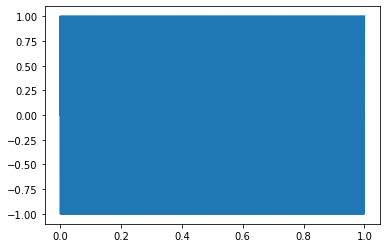

In [ ]:
taxa_de_amostragem = 44100 # hertz
duracao = 1.0 # segundos

# Criando o vetor de tempo
tempo = np.linspace(0.0, duracao, int(duracao*taxa_de_amostragem) + 1)

# Frequências das notas
freq_notas = {
    "do": 523.25,
    "mibemol": 622.25,
    "mi": 659.25,
    "sol": 784.0,
}

# A fórmula de uma senóide com frequência x é sen(2*pi*x*t)
nota_do = np.sin(2.0*np.pi*freq_notas["do"]*tempo)

# Visualizando o sinal da nota no tempo
plt.plot(tempo, nota_do)

# Transformando o array em áudio
Audio(nota_do, rate=taxa_de_amostragem)

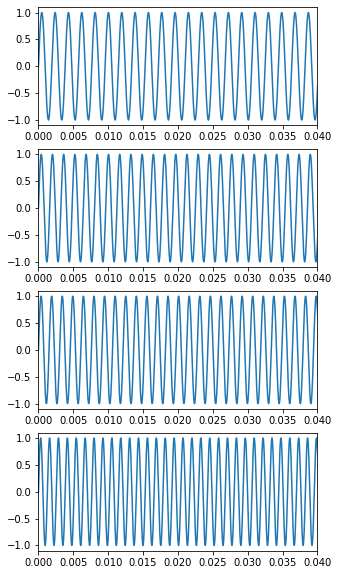

In [ ]:
# Fazendo as outras notas
nota_mibemol = np.sin(2.0*np.pi*freq_notas["mibemol"]*tempo)
nota_mi = np.sin(2.0*np.pi*freq_notas["mi"]*tempo)
nota_sol = np.sin(2.0*np.pi*freq_notas["sol"]*tempo)

# Visualizando as quatro notas no tempo sinal da nota no tempo
fig, axes = plt.subplots(4, 1, figsize=(5, 10))
axes[0].plot(tempo, nota_do)
axes[1].plot(tempo, nota_mibemol)
axes[2].plot(tempo, nota_mi)
axes[3].plot(tempo, nota_sol)
for ax in axes:
    ax.set_xlim(0.0, 0.04)

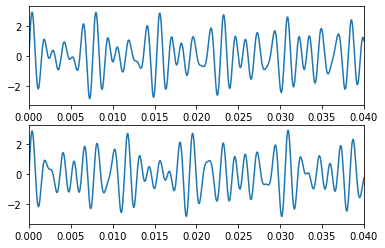

In [ ]:
# Fazendo os acordes dó maior e dó menor
acorde_do_maior = nota_do + nota_mi + nota_sol
acorde_do_menor = nota_do + nota_mibemol + nota_sol

# Visualizando os acorde no tempo
fig, axes = plt.subplots(2, 1)
axes[0].plot(tempo, acorde_do_maior)
axes[0].set_xlim(0.0, 0.04)
axes[1].plot(tempo, acorde_do_menor)
axes[1].set_xlim(0.0, 0.04)

# Ouvindo o acorde de dó maior
Audio(acorde_do_maior, rate=taxa_de_amostragem)

In [ ]:
# Ouvindo o acorde de dó menor
Audio(acorde_do_menor, rate=taxa_de_amostragem)

(0.0, 1000.0)

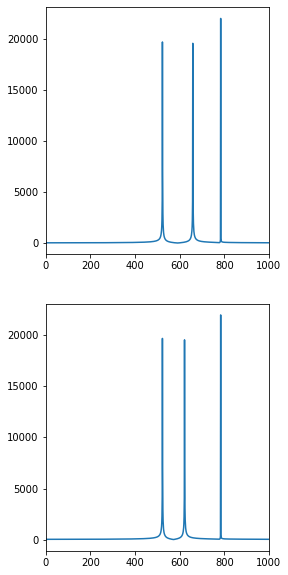

In [ ]:
# Calculando o vetor de frequências
freq = np.fft.rfftfreq(tempo.shape[0], d=1.0/taxa_de_amostragem)

# Fazendo a transformada de Fourier dos acordes
acorde_do_maior_f = np.fft.rfft(acorde_do_maior)
acorde_do_menor_f = np.fft.rfft(acorde_do_menor)

# Visualizando os espectros de magnitude dos acordes
fig, axes = plt.subplots(2, 1, figsize=(4, 10))
axes[0].plot(freq, np.abs(acorde_do_maior_f))
axes[0].set_xlim(0.0, 1000.0)
axes[1].plot(freq, np.abs(acorde_do_menor_f))
axes[1].set_xlim(0.0, 1000.0)

#### **Exercício**

Criar um acorde de lá menor no tempo.

Visualizar o acorde no tempo junto com o acorde de dó maior.

Ouvir o som do acorde.

Visualizar o espectro de magnitude do acorde.

Fazer um áudio com um som de dó maior seguido por lá menor.

> **Informações**:
- Lá menor: lá + dó + mi
- Frequência da nota lá: 440Hz

(0.0, 0.04)

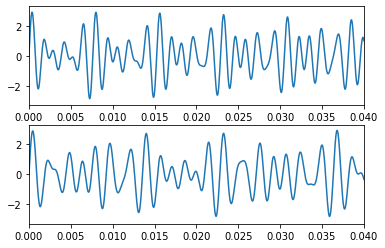

In [ ]:
freq_notas["la"] = 440.0

nota_la = np.sin(2.0*np.pi*freq_notas["la"]*tempo)

acorde_la_menor = nota_la + nota_do + nota_mi

fig, axes = plt.subplots(2, 1)
axes[0].plot(tempo, acorde_do_maior)
axes[0].set_xlim(0.0, 0.04)
axes[1].plot(tempo, acorde_la_menor)
axes[1].set_xlim(0.0, 0.04)

In [ ]:
Audio(acorde_la_menor, rate=taxa_de_amostragem)

(0.0, 1000.0)

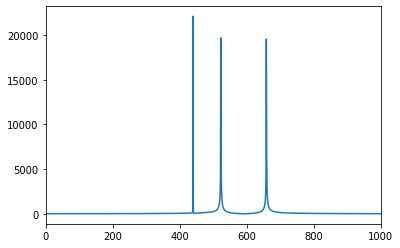

In [ ]:
acorde_la_menor_f = np.fft.rfft(acorde_la_menor)

# Visualizando os espectros de magnitude dos acordes
plt.plot(freq, np.abs(acorde_la_menor_f))
plt.xlim(0.0, 1000.0)

In [ ]:
acordes_do_la = np.concatenate((acorde_do_maior, acorde_la_menor))
Audio(acordes_do_la, rate=taxa_de_amostragem)

Agora voltaremos para a aplicação em dados sísmicos.

## Dado utilizado

Nós utilizaremos o conjunto de dados Stratton 3D, disponibilizado no formato SEG-Y pela SEG em [wiki.seg.org/wiki/Open_data](https://wiki.seg.org/wiki/Open_data). Trata-se de um dado terrestre 3D já processado adquirido no sul do Texas. Esse conjunto de dados foi cedido para estudos pelo Departamento de Geologia Econômica da Universidade de Texas em Austin (Bureau of Economic Geology at the University of Texas at Austin).

In [ ]:
# Criando a pasta de dados
!mkdir -p dados
# Fazendo download do dado
!wget http://s3.amazonaws.com/open.source.geoscience/open_data/stratton/segy/processed/Stratton3D_32bit.sgy -O dados/stratton.sgy

--2020-09-07 16:52:25--  http://s3.amazonaws.com/open.source.geoscience/open_data/stratton/segy/processed/Stratton3D_32bit.sgy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.140.174
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.140.174|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443764680 (423M) [application/octet-stream]
Saving to: ‘dados/stratton.sgy’

dados/stratton.sgy  100%[===================>] 423.21M  63.0MB/s    in 6.5s    

2020-09-07 16:52:31 (65.5 MB/s) - ‘dados/stratton.sgy’ saved [443764680/443764680]



## Formato SEG-Y

O formato SEG-Y foi inicialmente desenvolvido pela SEG no início da década de 70 com o objetivo de armazenar dados sísmicos demultiplexados para processamento. O formato passou por duas revisões em 2002 (rev1) e 2017 (rev2) para se adequar às novas necessidades da indústria. Uma lista com todos os formatos desenvolvidos pela SEG e suas especificações podem ser encontradas em: [seg.org/Publications/SEG-Technical-Standards](https://seg.org/Publications/SEG-Technical-Standards).

O formato SEG-Y armazena dados de forma sequêncial como mostrado abaixo:

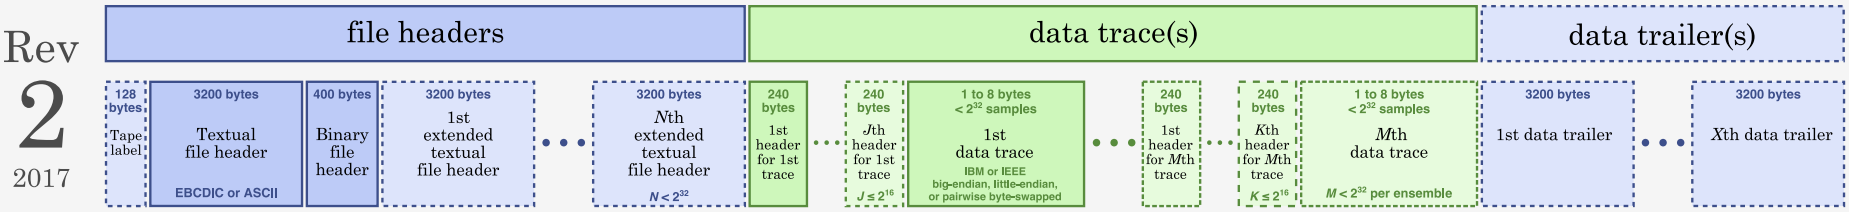

Os componentes principais de um dado SEG-Y são:
- Cabeçalho Textual
- Cabeçalho binário do arquivo
- Traços sísmicos, subdivididos por sua vez em:
  - Cabeçalho binário do traço
  - Dados do traço

O cabeçalho textual contém informações que podem ser lidas pelo usuário sem necessidade de qualquer software especializado.

No cabeçalho binário do arquivo estão informações relevantes para o arquivo como um todo, como o número de traços, intervalo de amostragem, codificação do dado, etc.

Já no cabeçalho binário do traço estão as informações relativas a cada traço, como por exemplo os números da inline e crossline, posição e etc.

### Lendo arquivos SEG-Y no Python com a biblioteca segyio

A biblioteca segyio é uma biblioteca de código aberto desenvolvida pela Equinor para leitura e escrita de arquivos no formato SEG-Y. Seu código fonte pode ser encontrado no GitHub: [github.com/equinor/segyio](https://github.com/equinor/segyio)

Aqui iremos somente fazer a leitura do arquivo de forma simplificada.

In [ ]:
# Instalando a biblioteca segyio
!pip install segyio

     |████████████████████████████████| 92kB 2.4MB/s 


In [ ]:
# Importando a biblioteca
import segyio

In [ ]:
# Tentando ler o arquivo
with segyio.open("dados/stratton.sgy") as stratton:
    print(stratton)

RuntimeError: ignored

O erro `RuntimeError: unable to find sorting.` indica que a biblioteca segyio não conseguiu ordenar os traços encontrados no arquivo de forma automática. Iremos investigar uma forma alternativa de ler o dado.

In [ ]:
# Tentando ler o arquivo ignorando a geometria
with segyio.open("dados/stratton.sgy", ignore_geometry=True) as stratton:
    # Imprimindo o header textual
    print(stratton.text)

bytearray(b'C01 STRATTON 3D Data Set                                            
            C02                                                                 
            C03 32-bit 3-D Volume                                               
            C04                                                                 
            C05                                                                 
            C06 DATA FORMAT      : IBM FLOATING POINT                           
            C07                                                                 
            C08 HEADER PARAMETER VALUE LOCATIONS:                               
            C09 PARAMETER NAME       HEADER CONTAINING VALUE    BYTE RANGE      
            C10 ==========================================================      
            C11   LINE NUMBER          BINARY                       5 - 8       
            C12   DATA FORMAT CODE     BINARY                      25 - 26      
            C13             

In [ ]:
# Tentando ler o arquivo com bytes diferentes dos padrões
with segyio.open("dados/stratton.sgy", iline=81, xline=85) as stratton:
    # Imprimindo informações do arquivo
    print(stratton)

stratton.iline[stratton.ilines[100]]

SegyFile dados/stratton.sgy:
  inlines: 230 [2193745, 2181150]
  crosslines: 309 [705550, 722490]
  traces: 71070
  samples: [0.000e+00 2.000e+00 4.000e+00 ... 2.996e+03 2.998e+03 3.000e+03]
  float representation: 4-byte IBM float


OSError: ignored

O erro `OSError: I/O operation on closed file` indica que no momento que tentamos acessar a inline o arquivo já estava fechado. Isso acontece porque ao sair do bloco `with` o arquivo é fechado automaticamente. Por isso devemos armazenar os dados que iremos utilizar ainda dentro do bloco `with`.

In [ ]:
# Tentando ler o arquivo com bytes diferentes dos padrões
with segyio.open("dados/stratton.sgy", iline=81, xline=85) as stratton:
    # Armazenando a inline 100 em um array antes de fechar o arquivo
    inline_100 = stratton.iline[stratton.ilines[100]]

    # Armazenando também os valores das amostras (tempo) e os números das crosslines
    tempo = stratton.samples
    crosslines = stratton.xlines

# Agora temos a inline_100 armazenada como um array do numpy!
print(type(inline_100))

<class 'numpy.ndarray'>


## Visualização de dados sísmicos

Agora que conseguimos ler uma inline do arquivo SEG-Y podemos visualizá-la. Para isso uma das alternativas é utilizar a função `imshow` do `matplotlib`, que permite visualizar uma matriz como uma imagem.

A função `imshow` nos permite escolher um mapa de cores e definir os valores extremos para a aplicação das cores. Usualmente a visualização de dados sísmicos é centrada no 0, por isso os limites devem ser definidos de forma simétrica.

Os mapas de cores disponíveis no `matplotlib` podem ser visualizados em [matplotlib.org/3.3.1/tutorials/colors/colormaps.html](https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html).

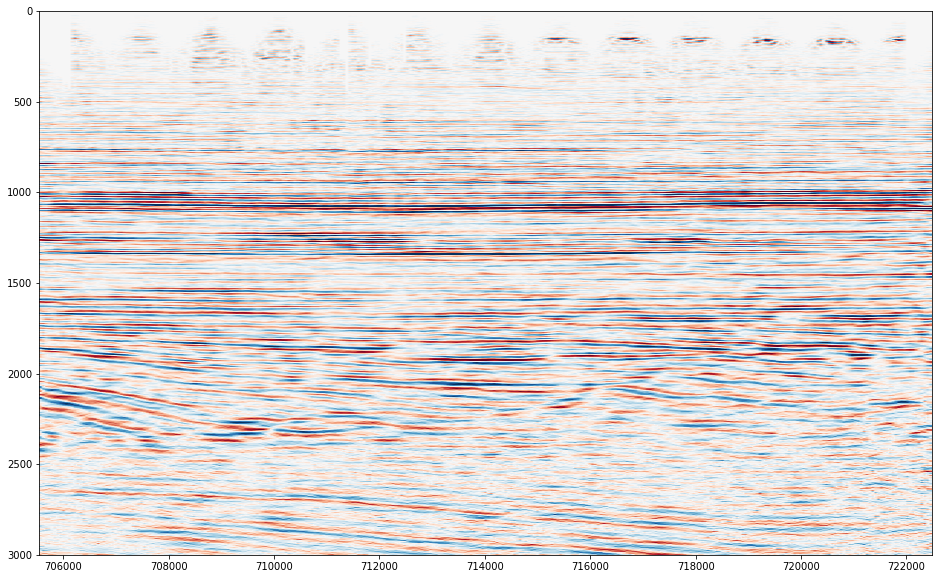

In [ ]:
# Obtenção do valor para limite de cores que é maior que 99% dos dados.
valor_clip = np.percentile(np.abs(inline_100), 99.0)

plt.figure(figsize=(16, 10))
plt.imshow(
    # A função imshow é preparada para trabalhar com figuras, em que o dado é
    # organizado linha a linha.
    # Como o dado sísmico é organizado traço a traço, devemos transpor o dado
    # para poder visualizá-lo de forma correta
    inline_100.T,
    # Permite que a figura cresça para se adaptar ao tamanho total disponível
    aspect="auto",
    # Mapa de cores que vai do vermelho ao azul, muito usado para sísmica
    cmap="RdBu",
    # Limites da escala de cor simétricos -> vmax=-vmin
    vmin=-valor_clip,
    vmax=valor_clip,
    # Extensão da visualização em termos de crosslines e tempo
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)

Também podemos visualizar um único traço em forma de onda, como pode ser feito em alguns softwares. Para isso devemos fazer uso da função `fill_betweenx` do matplotlib. Essa função permite preencher com uma cor sólida o espaço entre duas curvas.

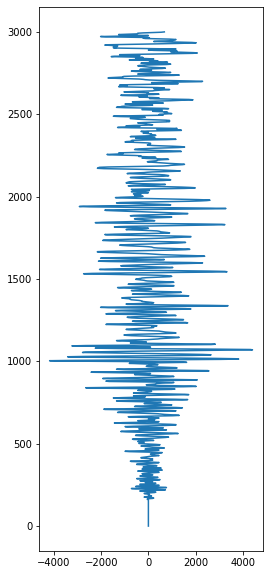

In [ ]:
plt.figure(figsize=(4, 10))
# Plotando o traço 50 da inline 100
plt.plot(inline_100[50], tempo)

(1000.0, 500.0)

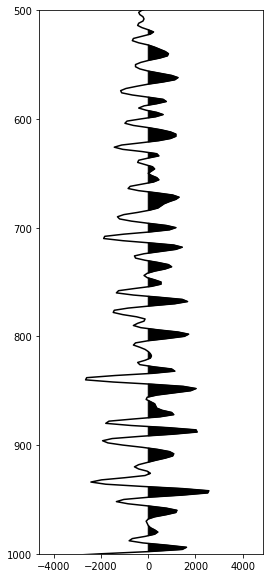

In [ ]:
plt.figure(figsize=(4, 10))
# Plotando o traço 50 da inline 100 com cor preta
plt.plot(inline_100[50], tempo, c="k")
# Preenchendo a curva onde a amplitude for maior que 0
plt.fill_betweenx(tempo, 0.0, inline_100[50], where=inline_100[50] > 0.0, interpolate=True, color="k")
# Zoom entre 500 e 1000 ms
plt.ylim(1000.0, 500.0)

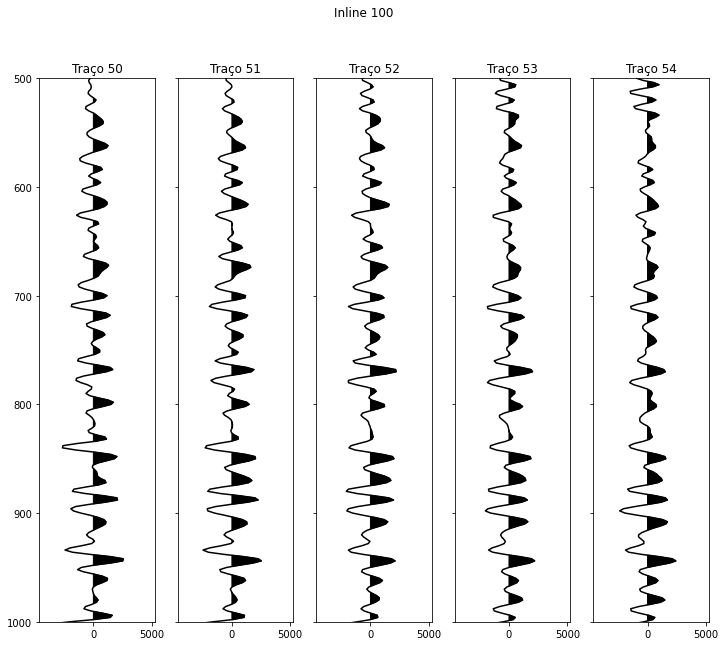

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 10), sharex=True, sharey=True)
fig.suptitle("Inline 100")
# Plotando diversos traços em sequência usando um loop
for i in range(5):
    axes[i].plot(inline_100[50+i], tempo, c="k")
    axes[i].fill_betweenx(tempo, 0.0, inline_100[50+i], where=inline_100[50+i] > 0.0, interpolate=True, color="k")
    axes[i].set_ylim(1000.0, 500.0)
    axes[i].set_title(f"Traço {50+i}")

## Espectros de magnitude e fase do dado sísmico

Agora iremos aplicar o que aprendemos sobre a transformada de Fourier para ver as frequências que compôem um traço sísmico.

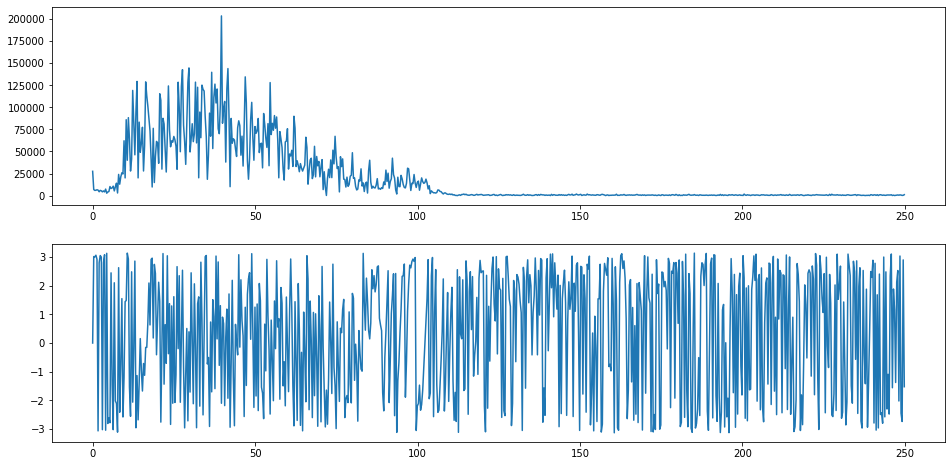

In [ ]:
# Selecionando o traço 50 da inline 100
traco = inline_100[50]

# Calculando o vetor de frequências (amostragem 2ms)
freq = np.fft.rfftfreq(tempo.shape[0], d=(tempo[1]-tempo[0])/1000.0)

# Calculando a transformada de Fourier do traço
traco_f = np.fft.rfft(traco)

# Calculando os espectros de magnitude e fase
magn = np.abs(traco_f)
# A função angle do numpy calcula a fase de um número complexo (ou um array de números complexos)
fase = np.angle(traco_f)

# Visualizando os espectros
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
axes[0].plot(freq, magn)
axes[1].plot(freq, fase)

Vamos contaminar o traço com um ruído de 100Hz nos traços 50, 51 e 52 e observar o que acontece.

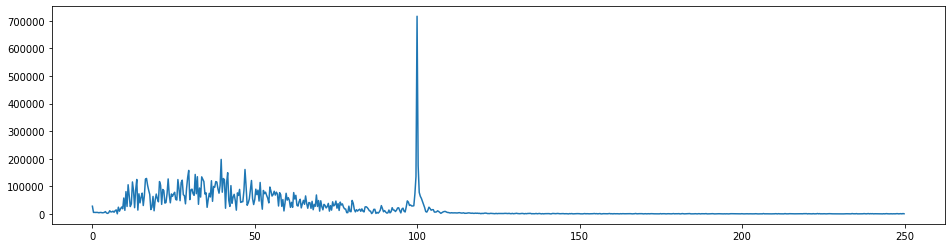

In [ ]:
# Adicionando o ruído no dado original
inline_100[51] += 500.0 * np.cos(2.0*np.pi*100.0*tempo/1000.0)
inline_100[52] += 500.0 * np.cos(2.0*np.pi*100.0*tempo/1000.0)
inline_100[53] += 500.0 * np.cos(2.0*np.pi*100.0*tempo/1000.0)

# Selecionando o traço 51 como exemplo
traco = inline_100[51]

# Calculando a transformada de Fourier do traço
traco_f = np.fft.rfft(traco)

# Calculando os espectros de magnitude e fase
magn = np.abs(traco_f)

# Visualizando os espectros
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.plot(freq, magn)

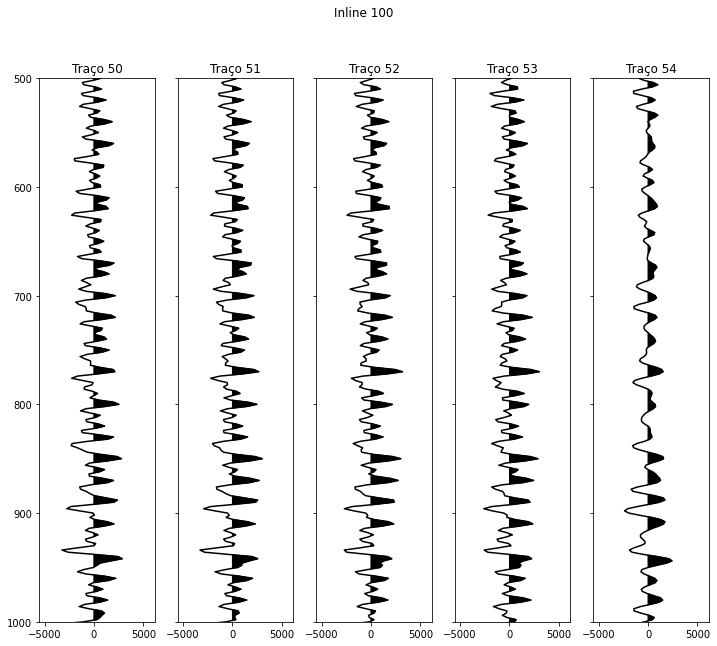

In [ ]:
# Visualizando novamente os traços no domínio do tempo
fig, axes = plt.subplots(1, 5, figsize=(12, 10), sharex=True, sharey=True)
fig.suptitle("Inline 100")
for i in range(5):
    axes[i].plot(inline_100[50+i], tempo, c="k")
    axes[i].fill_betweenx(tempo, 0.0, inline_100[50+i], where=inline_100[50+i] > 0.0, interpolate=True, color="k")
    axes[i].set_ylim(1000.0, 500.0)
    axes[i].set_title(f"Traço {50+i}")

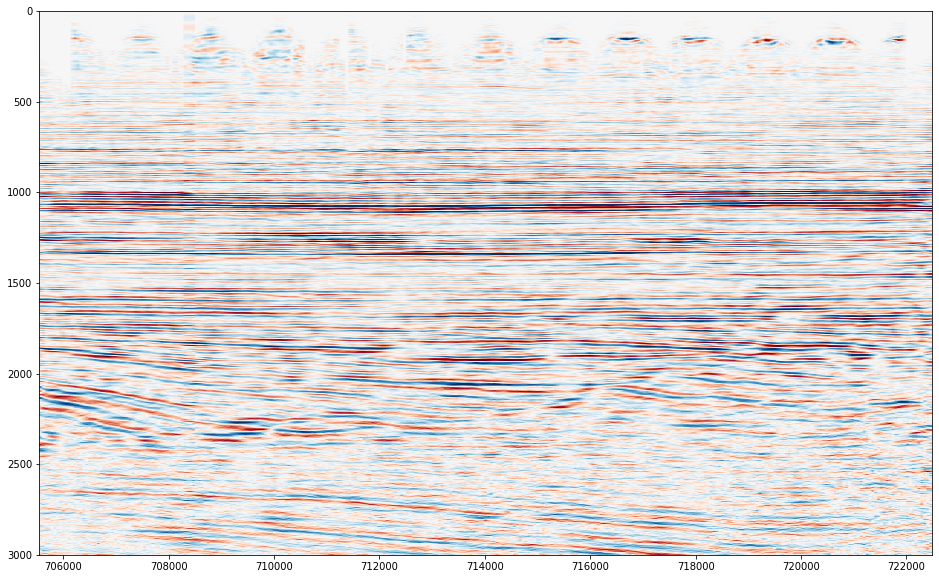

In [ ]:
# E também a seção
plt.figure(figsize=(16, 10))
plt.imshow(
    inline_100.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)

Também é possível calcular um espectro de magnitude para toda a seção. Uma das formas de se fazer isso é calcular a transformada de Fourier de todos traços, obter o espectro de magnitude e calcular a média entre os traços.

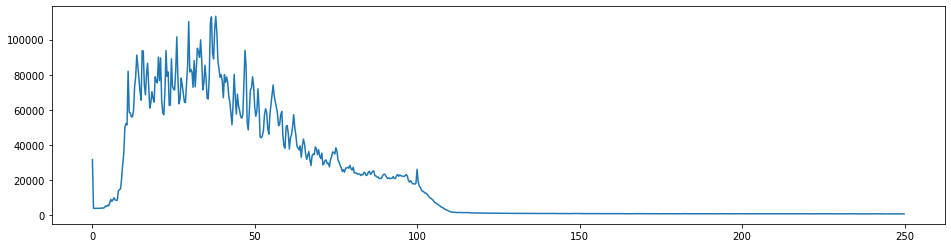

In [ ]:
# Calculando a transformada de Fourier de vários traços ao mesmo tempo
# O argumento axis indica a direção da transformada (axis=1 é o tempo no nosso caso)
inline_100_f = np.fft.rfft(inline_100, axis=1)

# Tirando a média dos espectros de mangnitude entre os traços (como agora é traço a traço utilizamos axis=0)
magn_inline_100 = np.mean(np.abs(inline_100_f), axis=0)

# Visualizando
plt.figure(figsize=(16, 4))
plt.plot(freq, magn_inline_100)

## Aplicando um filtro passa-baixa no dado sísmico

Agora que conseguimos representar a sísmica no domínio da frequência é possível aplicar filtros para eliminar frequências indesejadas.

Iremos criar um filtro que mantém as frequências até 80Hz e elimina as acima de 95Hz. Entre 80 e 95Hz teremos uma região de transição em que a amplitude irá diminuir gradativamente.

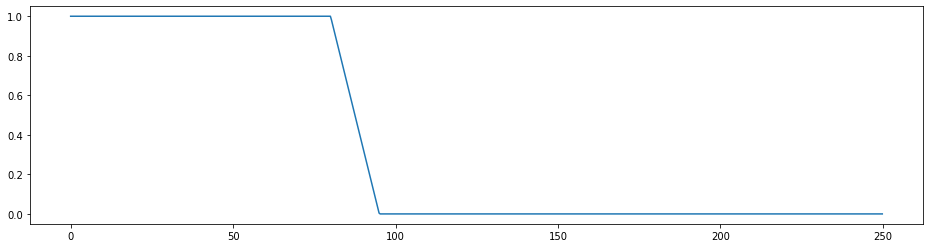

In [ ]:
# Cria um vetor com valor 1 do mesmo tamanho que o vetor de frequência
filtro = np.ones_like(freq)

# Define as regiões do filtro
regiao1 = (freq >= 80.0) & (freq < 95.0)
regiao2 = (freq >= 95.0)

# Elimina os valores acima de 100 Hz
filtro[regiao2] = 0.0

# Cria a regiao de transição
filtro[regiao1] = (95.0 - freq[regiao1]) / (95.0 - 80.0)

# Visualizando o filtro
plt.figure(figsize=(16, 4))
plt.plot(freq, filtro)

Agora para realizar a filtragem basta multiplicar o dado sísmico no domínio da frequência pelo nosso filtro.

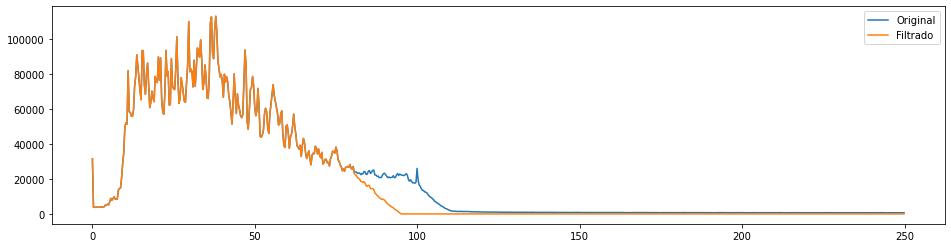

In [ ]:
# Aplicando o filtro
inline_100_filtr_f = inline_100_f * filtro

# Calculando o espectro de amplitude da seção filtrada
magn_inline_100_filtr = np.mean(np.abs(inline_100_filtr_f), axis=0)

# Visualizando
plt.figure(figsize=(16, 4))
plt.plot(freq, magn_inline_100, label="Original")
plt.plot(freq, magn_inline_100_filtr, label="Filtrado")
plt.legend()

Agora podemos fazer a transformada inversa do dado e visualizar a inline filtrada e a diferença entra o dado original e o dado filtrado.

Text(0.5, 1.0, 'Diferença')

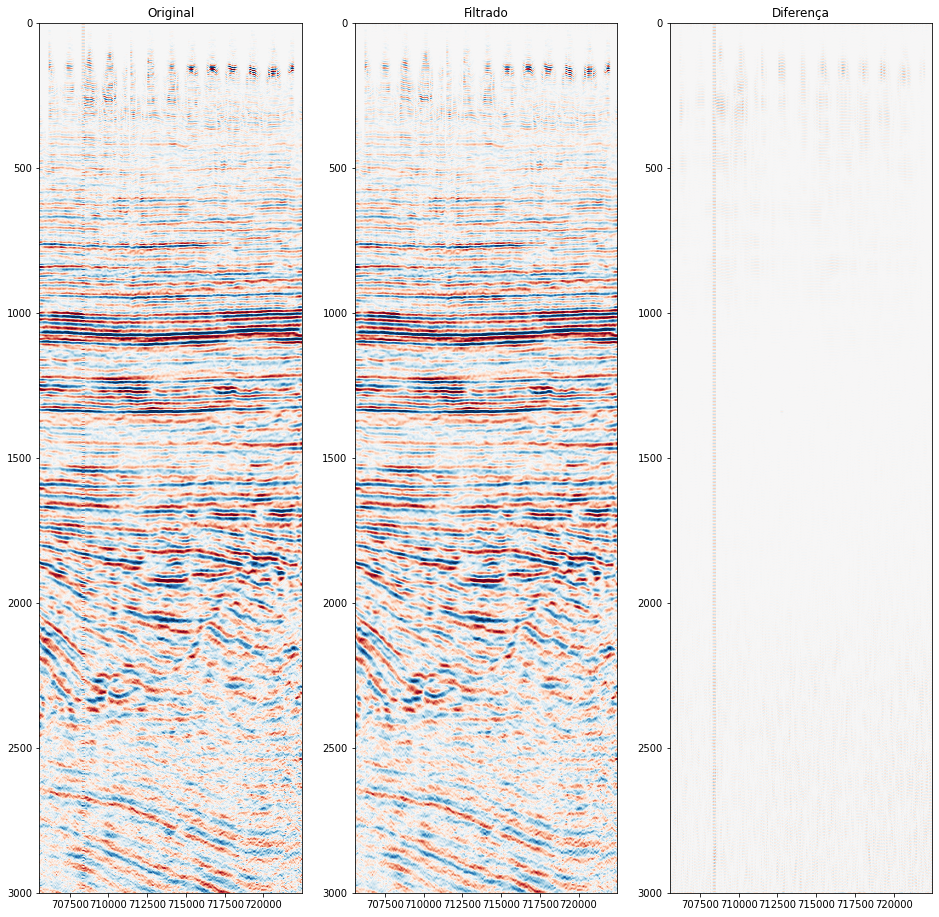

In [ ]:
# Transformada inversa de Fourier
# É necessário especificar a direção (axis) da mesma forma que a transformada direta
# Além disso é necessário especificar o tamanho do dado, pois existe ambiguidade para a transformada real (np.fft.rfft)
inline_100_filtr = np.fft.irfft(inline_100_filtr_f, n=inline_100.shape[1], axis=1)

fig, axes = plt.subplots(1, 3, figsize=(16, 16))
axes[0].imshow(
    inline_100.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[0].set_title("Original")
axes[1].imshow(
    inline_100_filtr.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[1].set_title("Filtrado")
axes[2].imshow(
    (inline_100 - inline_100_filtr).T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[2].set_title("Diferença")

### Exercício

Anteriormente criamos um filtro passa-baixa, isto é, todas frequências até um certo valor são mantidas.

Agora propõe-se criar um filtro passa-banda com 4 frequências, f1, f2, f3 e f4, de modo que:
- Até f1 as amplitudes são zeradas
- Entre f1 e f2 existe uma região de transição em que a amplitude aumenta gradualmente entre 0 e 1
- Entre f2 e f3 as frequências são mantidas
- Entre f3 e f4 existe outra região de transição em que a amplitude diminui gradualmente de 1 a 0
- Acima de f4 as amplitudes são zeradas

> **Sugestão**: Criar o filtro utilizando uma função que recebe o vetor de frequência e os valores de f1, f2, f3 e f4

In [ ]:
def filtro_passa_banda(freq, f1, f2, f3, f4):
    # Cria um vetor com valor 0 do mesmo tamanho que o vetor de frequência
    filtro = np.zeros_like(freq)

    # Define as regiões do filtro
    regiao1 = (freq >= f1) & (freq < f2)
    regiao2 = (freq >= f2) & (freq < f3)
    regiao3 = (freq >= f3) & (freq < f4)

    # Mantem os valores entre f2 e f3
    filtro[regiao2] = 1.0

    # Cria as regiões de transição
    filtro[regiao1] = (freq[regiao1] - f1) / (f2 - f1)
    filtro[regiao3] = (f4 - freq[regiao3]) / (f4 - f3)

    return filtro

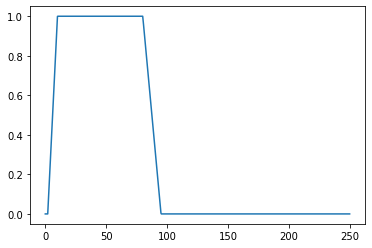

In [ ]:
# Criando um filtro 2-10-80-95
filtro = filtro_passa_banda(freq, 2.0, 10.0, 80.0, 95.0)

# Visualizando o filtro
plt.plot(freq, filtro)

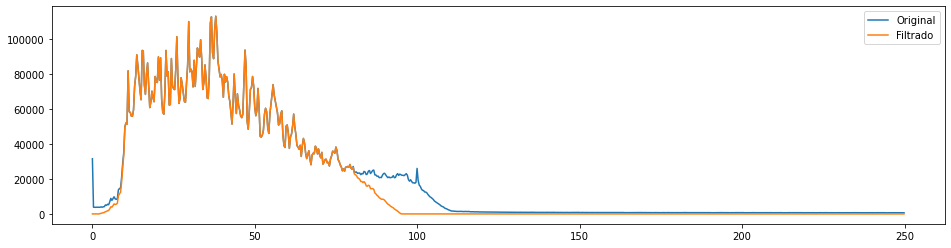

In [ ]:
inline_100_filtr_f = inline_100_f * filtro

magn_inline_100_filtr = np.mean(np.abs(inline_100_filtr_f), axis=0)

plt.figure(figsize=(16, 4))
plt.plot(freq, magn_inline_100, label="Original")
plt.plot(freq, magn_inline_100_filtr, label="Filtrado")
plt.legend()

Text(0.5, 1.0, 'Diferença')

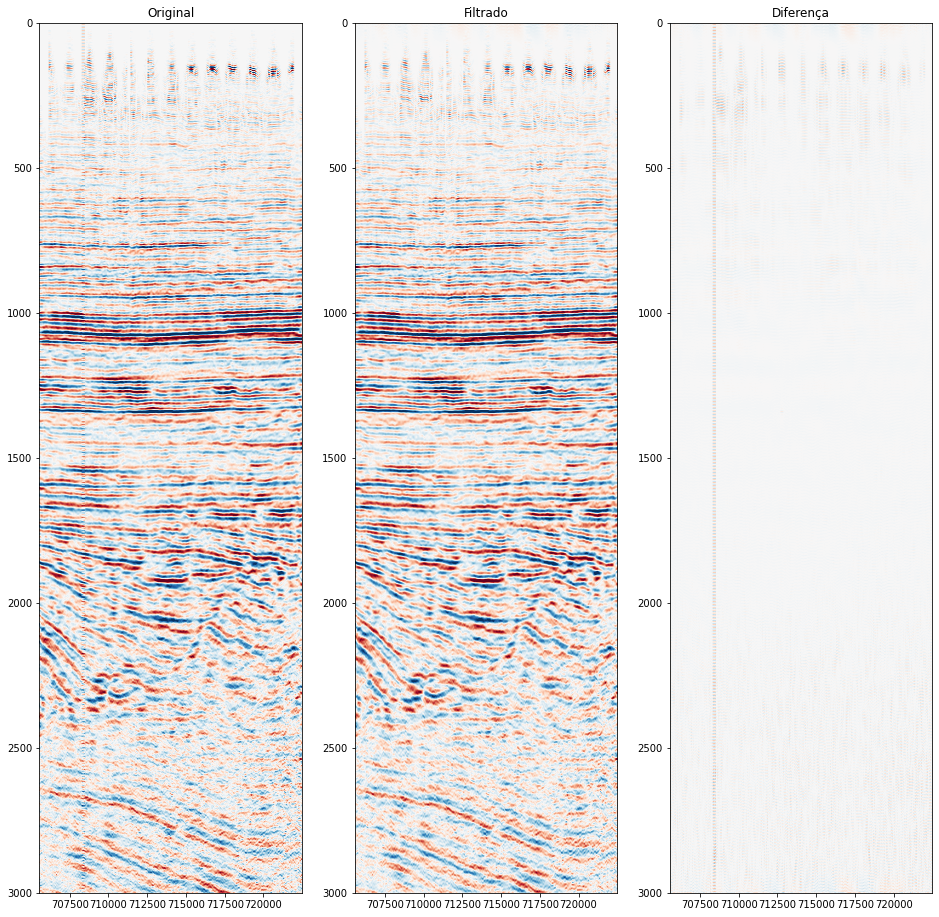

In [ ]:
inline_100_filtr = np.fft.irfft(inline_100_filtr_f, n=inline_100.shape[1], axis=1)

fig, axes = plt.subplots(1, 3, figsize=(16, 16))
axes[0].imshow(
    inline_100.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[0].set_title("Original")
axes[1].imshow(
    inline_100_filtr.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[1].set_title("Filtrado")
axes[2].imshow(
    (inline_100 - inline_100_filtr).T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[2].set_title("Diferença")

In [1]:
from builtins import print

In [2]:
print

<function print>